In [1]:
#import important libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from IPython.core.interactiveshell import InteractiveShell

# for plotting:
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df = pd.read_excel(r'C:\\Users\\Big data\\Desktop\\class\\cardproject\\data\\card.xls',encoding='utf-16')
df.head()

,Unnamed: 0,age,serveTime,credLimit,Loan,SalPerY,holdCard,Career
0,3448,30.0,NaN,300000,1.0,100000.0,0,2
1,3468,29.0,NaN,250000,1.0,100000.0,0,2
2,3214,29.0,12.0,180000,NaN,100000.0,0,2
3,2598,24.0,NaN,130000,NaN,100000.0,0,3
4,1611,NaN,36.0,60000,0.0,100000.0,0,1


In [52]:
#觀察缺失值
df.info()
#有值者接過半,一般最低好像是40%
#統計量
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
Unnamed: 0    2016 non-null int64
age           1711 non-null float64
serveTime     1730 non-null float64
credLimit     2016 non-null int64
Loan          1676 non-null float64
SalPerY       1555 non-null float64
holdCard      2016 non-null int64
Career        2016 non-null int64
dtypes: float64(4), int64(4)
memory usage: 126.1 KB


,Unnamed: 0,age,serveTime,credLimit,Loan,SalPerY,holdCard,Career
count,2016.000000,1711.000000,1730.000000,2.016000e+03,1676.000000,1.555000e+03,2016.000000,2016.000000
mean,1822.538690,26.884278,29.952601,1.475501e+05,0.459427,5.645081e+05,0.442956,2.112599
std,1027.449265,4.791384,58.083863,1.859350e+05,0.885789,4.389883e+05,0.496859,0.634586
min,2.000000,20.000000,0.000000,1.000000e+04,0.000000,1.000000e+05,0.000000,1.000000
25%,963.500000,23.000000,5.000000,5.000000e+04,0.000000,3.600000e+05,0.000000,2.000000
50%,1825.000000,26.000000,13.000000,1.000000e+05,0.000000,5.000000e+05,0.000000,2.000000
75%,2714.250000,30.000000,36.000000,1.800000e+05,1.000000,6.500000e+05,1.000000,2.000000
max,3527.000000,56.000000,1500.000000,4.500000e+06,3.000000,1.000000e+07,1.000000,4.000000


In [44]:
vars_na = [ var for var in df.columns if df[var].isna().sum() > 1]
for var in vars_na:
    print(var, np.round(df[var].isnull().mean(), 3),  ' % missing values')
#只有age ,serveTime ,Loan ,SalPerY 有缺失值,分析這四個分布即可
#在我們卡片原樣本中,0與無資料的差異是否相同?

age 0.151  % missing values
serveTime 0.142  % missing values
Loan 0.169  % missing values
SalPerY 0.229  % missing values


In [38]:
vars_na

['age', 'serveTime', 'Loan', 'SalPerY']

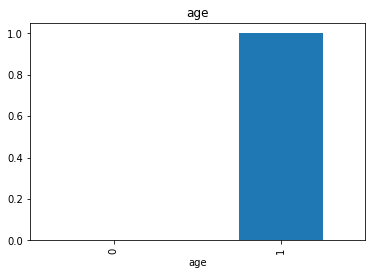

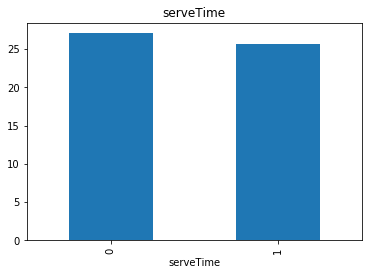

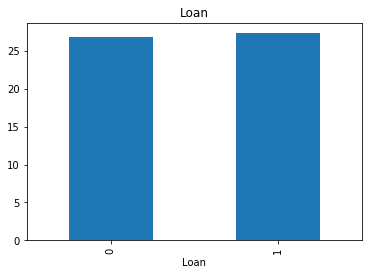

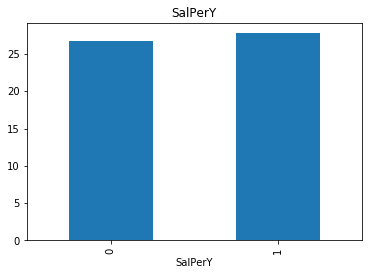

In [48]:
def analyze_na_value(df,var):
    df = df.copy()
    
    
    # 條件機率,觀察交互影響大不大,若不大,應該用平均數或種樹填補即可
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # plt出在不同項目下,是否為遺漏值之其他變數差異
    df.groupby(var)['age'].mean().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_na:
    analyze_na_value(df, var)

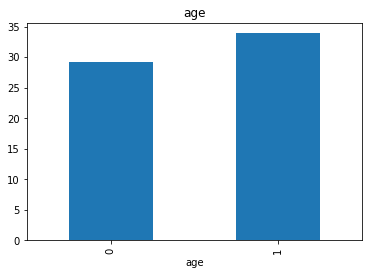

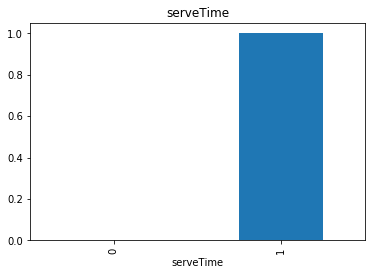

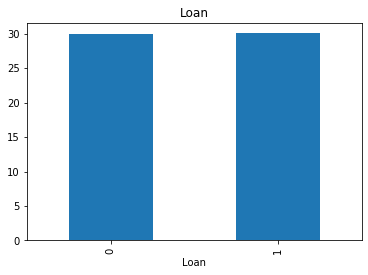

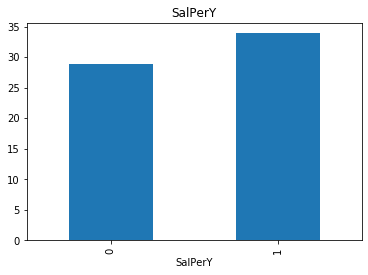

In [49]:
def analyze_na_value(df,var):
    df = df.copy()
    
    
    # 條件機率,觀察交互影響大不大,若不大,應該用平均數或種樹填補即可
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # plt出在不同項目下,是否為遺漏值之其他變數差異
    df.groupby(var)['serveTime'].mean().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_na:
    analyze_na_value(df, var)

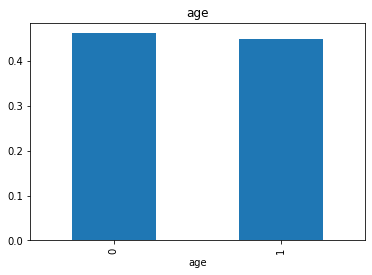

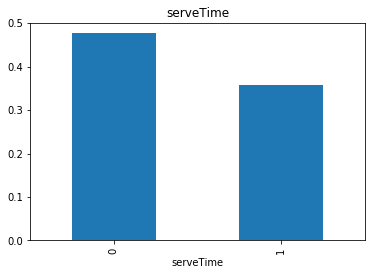

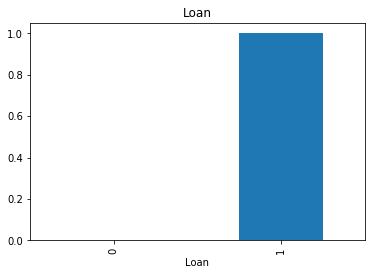

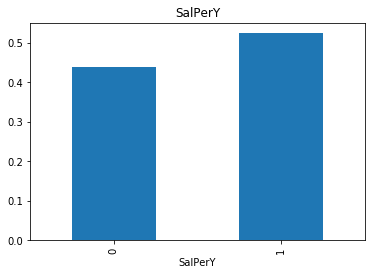

In [50]:
def analyze_na_value(df,var):
    df = df.copy()
    
    
    # 條件機率,觀察交互影響大不大,若不大,應該用平均數或種樹填補即可
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # plt出在不同項目下,是否為遺漏值之其他變數差異
    df.groupby(var)['Loan'].mean().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_na:
    analyze_na_value(df, var)

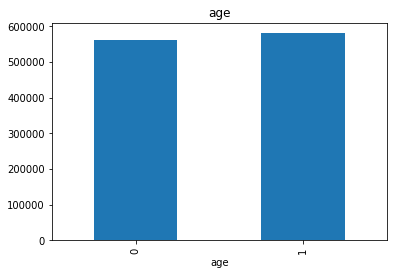

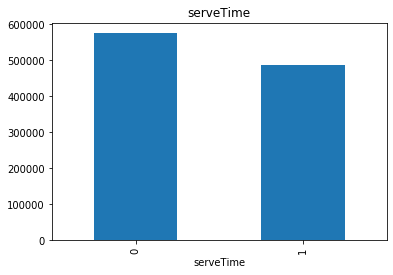

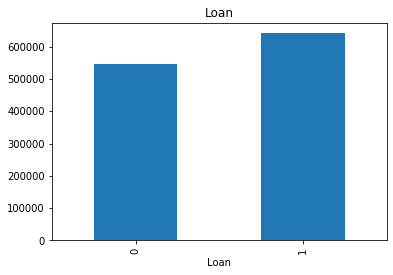

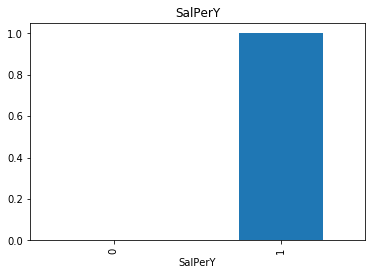

In [51]:
def analyze_na_value(df,var):
    df = df.copy()
    
    
    # 條件機率,觀察交互影響大不大,若不大,應該用平均數或種樹填補即可
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # plt出在不同項目下,是否為遺漏值之其他變數差異
    df.groupby(var)['SalPerY'].mean().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_na:
    analyze_na_value(df, var)

# 看來似乎該欄位遺漏與否並不影響其他欄位之值(目測)但是還試試看其他補值法

In [97]:
from impyute.imputation.cs import fast_knn
from impyute.imputation.cs import mice
from sklearn.preprocessing import Imputer

In [93]:
#KNN補值
imputed_training = fast_knn(df,k=2)
imputed_training.to_excel("C:\\Users\\Big data\\Desktop\\class\\boredcardproject\\data\\fast_knn.xls")

In [96]:
#mice補值
df_mice = mice(df)
df_mice.to_excel("C:\\Users\\Big data\\Desktop\\class\\boredcardproject\\data\\mice.xls")

C:\ProgramData\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [ ]:
['age', 'serveTime', 'Loan', 'SalPerY']

In [107]:
#平均數捕值
df_mean = pd.DataFrame(columns=['age', 'serveTime', 'Loan', 'SalPerY'])
df_mean['age']=df['age'].fillna(df['age'].mean())
df_mean['serveTime']=df['serveTime'].fillna(df['serveTime'].mean())
df_mean['Loan']=df['Loan'].fillna(df['Loan'].mean())
df_mean['SalPerY']=df['SalPerY'].fillna(df['SalPerY'].mean())
df_mean.to_excel("C:\\Users\\Big data\\Desktop\\class\\boredcardproject\\data\\df_mean.xls")

,age,serveTime,Loan,SalPerY
0,30.000000,29.952601,1.000000,100000.000000
1,29.000000,29.952601,1.000000,100000.000000
2,29.000000,12.000000,0.459427,100000.000000
3,24.000000,29.952601,0.459427,100000.000000
4,26.884278,36.000000,0.000000,100000.000000
5,20.000000,12.000000,0.000000,100000.000000
6,24.000000,12.000000,0.000000,100000.000000
7,25.000000,12.000000,0.459427,100000.000000
8,20.000000,29.952601,0.000000,100000.000000
9,22.000000,29.952601,0.000000,100000.000000


In [109]:
#眾樹捕值
df_median = pd.DataFrame(columns=['age', 'serveTime', 'Loan', 'SalPerY'])
df_median['age']=df['age'].fillna(df['age'].median())
df_median['serveTime']=df['serveTime'].fillna(df['serveTime'].median())
df_median['Loan']=df['Loan'].fillna(df['Loan'].median())
df_median['SalPerY']=df['SalPerY'].fillna(df['SalPerY'].median())
df_median.to_excel("C:\\Users\\Big data\\Desktop\\class\\boredcardproject\\data\\df_median.xls")

In [ ]:
#隨基森林

In [ ]:
#虛擬便量